# Everyone Can Learn Data Scholarship

## 📖 Background
The second "Everyone Can Learn Data" Scholarship from DataCamp is now open for entries. 

The challenges below test your coding skills you gained from beginner courses on either Python, R, or SQL. Pair them **with the help of AI** and your **creative thinking skills** and win **$5,000** for your future data science studies!

The scholarship is open to secondary and undergraduate students, and other students preparing for graduate-level studies (getting their Bachelor degree). Postgraduate students (PhDs) or graduated students (Master degree) cannot apply. 

The challenge consist of two parts, make sure to complete both parts before submitting. Good luck!

## 💡 Learn more

The following DataCamp courses can help review the skills to get started for this challenge:

* [Intermediate Python](https://app.datacamp.com/learn/courses/intermediate-python)
* [Introduction to the Tidyverse in R](https://app.datacamp.com/learn/courses/introduction-to-the-tidyverse)
* [Introduction to SQL](https://www.datacamp.com/courses/introduction-to-sql)

## ℹ️ Introduction to Data Science Notebooks

You can skip this section if you are already familiar with data science notebooks.

### Data science notebooks
A _data science notebook_ is a document containing text cells (what you're reading now) and code cells. What is unique with a notebook is that it's **interactive**: You can change or add code cells and then **run** a cell by selecting it and then clicking the **Run** button to the right ( <strong>▶</strong>, or Run All on top) or hitting `control + enter`.

The result will be displayed directly in the notebook. 

Try running the Python cell below:

In [0]:
# Run this cell to see the result (click on Run on the right, or Ctrl|CMD + Enter)
100 * 1.75 * 20

Modify any of the numbers and rerun the cell. 

You can add a Markdown, Python|R, or SQL cell by clicking on the **Add Markdown**, **Add Code**, and **Add SQL** buttons that appear as you move the mouse pointer near the bottom of any cell. 

🤖 You can also make use of our AI assistent, by asking it what you want to do. See it in action [here](https://www.datacamp.com/blog/data-to-insights-datcamp-workspace-ai-assistant).

Here at DataCamp, we call our interactive notebook **Workspace**. You can find out more about Workspace [here](https://workspace-docs.datacamp.com/).

# 1️⃣ Part 1 (Python) - Dinosaur data 🦕

## 📖 Background
You're applying for a summer internship at a national museum for natural history. The museum recently created a database containing all dinosaur records of past field campaigns. Your job is to dive into the fossil records to find some interesting insights, and advise the museum on the quality of the data. 

## 💾 The data

### You have access to a real dataset containing dinosaur records from the Paleobiology Database ([source](https://paleobiodb.org/#/)):


| Column name | Description |
|---|---|
| occurence_no | The original occurrence number from the Paleobiology Database. |
| name | The accepted name of the dinosaur (usually the genus name, or the name of the footprint/egg fossil). |
| diet | The main diet (omnivorous, carnivorous, herbivorous). |
| type | The dinosaur type (small theropod, large theropod, sauropod, ornithopod, ceratopsian, armored dinosaur). |
| length_m | The maximum length, from head to tail, in meters. |
| max_ma | The age in which the first fossil records of the dinosaur where found, in million years. |
| min_ma | The age in which the last fossil records of the dinosaur where found, in million years. |
| region | The current region where the fossil record was found. |
| lng | The longitude where the fossil record was found. |
| lat | The latitude where the fossil record was found. |
| class | The taxonomical class of the dinosaur (Saurischia or Ornithischia). |
| family | The taxonomical family of the dinosaur (if known). |

The data was enriched with data from Wikipedia.

In [3]:
# Import the pandas and numpy packages
import pandas as pd
import numpy as np 
# Load the data
dinosaurs = pd.read_csv('data/dinosaurs.csv')

In [3]:
# Preview the dataframe
dinosaurs

,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
0,130294,Protarchaeopteryx,omnivorous,small theropod,2.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Archaeopterygidae
1,130295,Caudipteryx,omnivorous,small theropod,1.0,130.0,122.46,Liaoning,120.733330,41.799999,Saurischia,Caudipterygidae
2,139242,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.528732,50.740726,Saurischia,Tyrannosauridae
3,139250,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.549347,50.737015,Saurischia,Tyrannosauridae
4,139252,Gorgosaurus,carnivorous,large theropod,8.6,83.5,70.60,Alberta,-111.564636,50.723866,Saurischia,Tyrannosauridae
...,...,...,...,...,...,...,...,...,...,...,...,...
4946,1360627,Isaberrysaura,NaN,NaN,NaN,171.6,168.40,Neuquén,-70.263290,-39.205288,Ornithischia,NaN
4947,1363632,Stegosaurus,herbivorous,armored dinosaur,9.0,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,Stegosauridae
4948,1363633,Othnielosaurus,NaN,NaN,NaN,157.3,152.10,Wyoming,-107.816666,44.650002,Ornithischia,NaN
4949,1364695,Iguanodon,herbivorous,ornithopod,10.0,145.0,139.80,Niedersachsen,9.959357,52.341167,Ornithischia,NaN


## 💪 Challenge I
Help your colleagues at the museum to gain insights on the fossil record data. Include:


1. How many different dinosaur names are present in the data?
2. Which was the largest dinosaur? What about missing data in the dataset?
3. What dinosaur type has the most occurrences in this dataset? Create a visualization (table, bar chart, or equivalent) to display the number of dinosaurs per type. Use the AI assistant to tweak your visualization (colors, labels, title...).
4. Did dinosaurs get bigger over time? Show the relation between the dinosaur length and their age to illustrate this.
5. Use the AI assitant to create an interactive map showing each record. 
6. Any other insights you found during your analysis?

# 🦖 Challenge 1.1 : Analysis of dataset around the unique Names

Number of unique dinosaur names: 1042

Dominant Dinosaur Names and Families:

The bar chart displays the 15 most dominant dinosaur names in terms of occurrences in the Paleo-biology database.
These dinosaurs make up more than 30% of the dinosaurs in the given dataset.


This pie chart reveals a surprising truth about the dino dominance. While "Hadrosauridae" stands out as the most prevalent family with unique named species (5.2%), an astonishing 45.5% of dinosaurs lack a defined family classification. This suggests a significant reservoir of uncategorized diversity, awaiting discovery within the fossil record.

Additionally, the top 5 families with unique dinosaur names collectively represent 17.4% of the named species in our dataset, while the remaining 37.5% of names are distributed across a staggering 70 families, showcasing the vast diversity within the dinosaur kingdom.
    


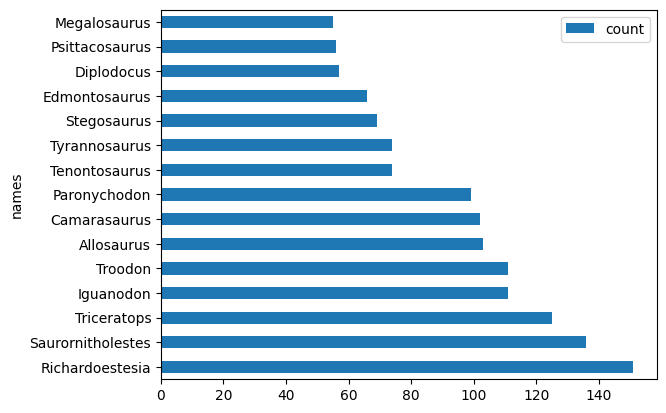

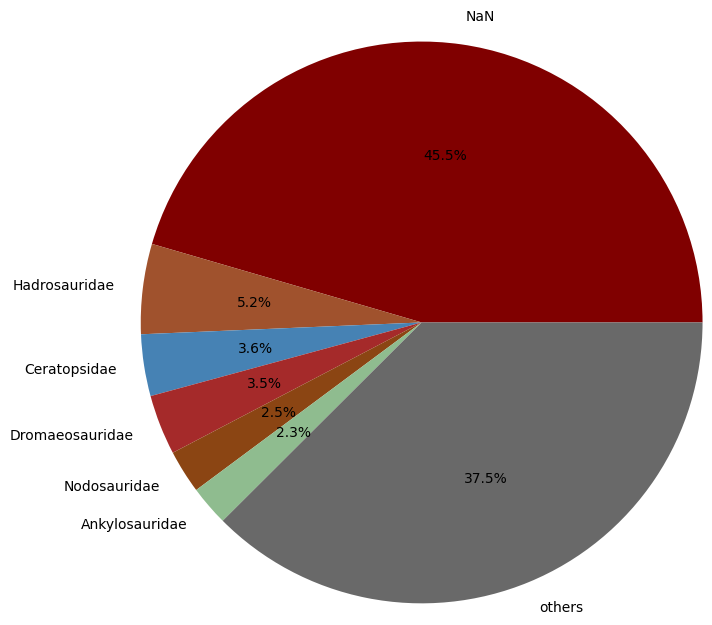

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dinosaurs = pd.read_csv('data/dinosaurs.csv')
unique = dinosaurs['name'].unique()
print(f"Number of unique dinosaur names: {unique.size}")
# print(f"Number of unique dinosaur names: {dinosaurs['family'].unique()}")

dictionary = dict()

for value in unique:
    dictionary.update({value : [(dinosaurs.loc[dinosaurs["name"] == value]['occurrence_no'].count()), dinosaurs.loc[dinosaurs["name"] == value]['family'].unique()[0]] })

destruct =  list(dictionary.values())

# print(destruct)
count = list()
family = list()

for value in destruct:
    count.append(value[0])
    family.append(value[1])

dictionary = dict({"names" : dictionary.keys(), "count" : count, "family" : family })
cleaned = pd.DataFrame(data = dictionary)
bar_chart = cleaned.sort_values(by=['count'], ascending=False).head(15)
bar_chart.plot.barh(x='names', y='count', rot = 0)

print(
"""
Dominant Dinosaur Names and Families:

The bar chart displays the 15 most dominant dinosaur names in terms of occurrences in the Paleo-biology database.
These dinosaurs make up more than 30% of the dinosaurs in the given dataset.
""")

families = cleaned['family'].unique().tolist()
dinos = pd.DataFrame(data = dictionary).to_numpy()

pie_dictionary = dict()

for family in families:
    if pd.isna(family):
        continue
    pie_dictionary.update({family: cleaned.loc[cleaned['family'] == family]['names'].count()})
pie_dictionary.update({"NaN": cleaned.loc[cleaned['family'].isnull()]['names'].count()})

unique_dino_count = list()
data = list(pie_dictionary.values())

for datum in data:
    unique_dino_count.append(datum)

pie_df = pd.DataFrame({
    "unique_names": unique_dino_count
}, index = pie_dictionary.keys())

pie_chart = pie_df.sort_values(by = ['unique_names'], ascending=False).head(6)

names = pie_chart['unique_names'].tolist()
names.append(sum(pie_df.drop(pie_chart.index)['unique_names']))
indices = pie_chart.index.tolist()
indices.append('others')

fig, ax = plt.subplots()
ax.pie(names, labels=indices, autopct='%1.1f%%', radius =1.9,
       colors=['maroon', 'sienna', 'steelblue', 'brown', 'saddlebrown', 'darkseagreen', 'dimgray', 'darkred', 'steelblue', 'navy', 'peru']);

print(
    """
This pie chart reveals a surprising truth about the dino dominance. While "Hadrosauridae" stands out as the most prevalent family with unique named species (5.2%), an astonishing 45.5% of dinosaurs lack a defined family classification. This suggests a significant reservoir of uncategorized diversity, awaiting discovery within the fossil record.

Additionally, the top 5 families with unique dinosaur names collectively represent 17.4% of the named species in our dataset, while the remaining 37.5% of names are distributed across a staggering 70 families, showcasing the vast diversity within the dinosaur kingdom.
    """)


# 👀 Challenge 1.2: Largest dino and the mystery of missing facts

In [18]:
import pandas as pd
import numpy as np 
#Will be back soon to uncover this chapter
dinosaurs = pd.read_csv('data/dinosaurs.csv')
maxLength = dinosaurs['length_m'].max()
dinosaurs.loc[dinosaurs['length_m'] == maxLength]


,occurrence_no,name,diet,type,length_m,max_ma,min_ma,region,lng,lat,class,family
570,465134,Supersaurus,herbivorous,sauropod,35.0,155.7,145.0,Colorado,-108.397202,38.583099,Saurischia,Diplodocidae
924,489575,Supersaurus,herbivorous,sauropod,35.0,155.7,145.0,Estremadura,-9.343696,39.216393,Saurischia,Diplodocidae
1165,513500,Argentinosaurus,herbivorous,sauropod,35.0,99.6,89.8,Neuquén,-69.059998,-38.916672,Saurischia,NaN
1423,541209,Supersaurus,herbivorous,sauropod,35.0,157.3,145.0,Colorado,-109.036133,39.200081,Saurischia,Diplodocidae
1972,693186,Supersaurus,herbivorous,sauropod,35.0,157.3,145.0,Wyoming,-105.439041,42.629375,Saurischia,Diplodocidae


## 🦖 The Titanomachy for Top Dino: Supersaurus vs. Argentinosaurus

Our data reveals a tie for the title of **"Largest Dinosaur."** Two titans share the crown: **Supersaurus** and **Argentinosaurus**. However, Supersaurus seems to have a slight edge, appearing as the champion four times in our dataset as largest dinosaur, compared to Argentinosaurus' single occurance as largest dino.

### Supersaurus

Let's delve into the world of Supersaurus:

- **A Gentle Giant:** Supersaurus enjoyed a plant-based diet, munching on the abundant flora of the American plains.
- **Family Ties:** It belonged to the Diplodocidae family, known for their impressive lifespans and vegetarian palates.
- **Fossil Finds:** Supersaurus remains have primarily been unearthed in the grassy plains of the USA, an ideal habitat for herbivores due to its wealth of vegetation.
- **Distinctive Design:** Its type hints at a lengthy neck, and its class, **"saurischia"** often phrased as _lizard-hipped dinosaurs_, sets it apart based on its unique hip structure, [Discover More](https://ucmp.berkeley.edu/diapsids/saurischia/saurischia.html)

### Argentinosaurus

Let's explore some quick facts about Argentinosaurus:

- As the name suggests Argentinosaurus was named after Argentina for being discovered there.
- Argentinosaurus has only one occurance of being the largest in our dataset but its a mommoth voyaging through the lands of Argentina and it was found in Neuquén region of Argentina.
- Argentinosaurus was herbivorous, type "sauropod" suggests a long neck and class "Saurischia" suggests a very specific hip structure.
- The mystery surrounding its family adds another layer of fascination.

## The Intrigue Continues...

While Supersaurus claims the edge in numbers, the battle for "largest dino" is far from over. Each discovery sheds new light on these giants, leaving us with more questions than answers. Who holds the true crown? Only time and future fossil finds will tell!


## 😾 Mystery of the unknown 

In [5]:
import pandas as pd
import numpy as np 

dinosaurs = pd.read_csv('data/dinosaurs.csv')

noLengthDinos = dinosaurs.loc[dinosaurs['length_m'].isna()]
noLengthDinos.sort_values()



TypeError: sort_values() missing 1 required positional argument: 'by'

# 2️⃣ Part 2 (SQL) - Understanding movie data 🎥 

## 📖 Background
You have just been hired by a large movie studio to perform data analysis. Your manager, an executive at the company, wants to make new movies that "recapture the magic of old Hollywood." So you've decided to look at the most successful films that came out before Titanic in 1997 to identify patterns and help generate ideas that could turn into future successful films.

## 💾 The data

### You have access to the following table, _**cinema.films**_:

| Column name | Description |
|---|---|
| id | Unique movie identifier. |
| title | The title of the movie. |
| release_year | The year the movie was released to the public. |
| country | The country in which the movie was released. |
| duration | The runtime of the movie, in minutes. |
| language | The original language the movie was produced in. |
| certification | The [rating](https://simple.wikipedia.org/wiki/Motion_Picture_Association_film_rating_system) the movie was given based on their suitability for audiences. |
| gross | The revenue the movie generated at the box office, in USD. |
| budget | The available budget the production had for producing the movie, in USD. |

You can click the "Browse tables" button in the upper right-hand corner of the SQL cell below to view the available tables. They will show on the left of the notebook.

The data was sourced from [IMDb](https://www.imdb.com/).

In [16]:
SELECT * 
FROM cinema.films
LIMIT 10

,id,title,release_year,country,duration,language,certification,gross,budget
0,1,Intolerance: Love's Struggle Throughout the Ages,1916,USA,123,,Not Rated,NaN,385907.0
1,2,Over the Hill to the Poorhouse,1920,USA,110,,,3000000.0,100000.0
2,3,The Big Parade,1925,USA,151,,Not Rated,NaN,245000.0
3,4,Metropolis,1927,Germany,145,German,Not Rated,26435.0,6000000.0
4,5,Pandora's Box,1929,Germany,110,German,Not Rated,9950.0,NaN
5,6,The Broadway Melody,1929,USA,100,English,Passed,2808000.0,379000.0
6,7,Hell's Angels,1930,USA,96,English,Passed,NaN,3950000.0
7,8,A Farewell to Arms,1932,USA,79,English,Unrated,NaN,800000.0
8,9,42nd Street,1933,USA,89,English,Unrated,2300000.0,439000.0
9,10,She Done Him Wrong,1933,USA,66,English,Approved,NaN,200000.0


In [1]:
SELECT * FROM cinema.descriptions

,description,length,rating
0,A Epic Drama of a Feminist And a Mad Scientist...,86,PG
1,A Astounding Epistle of a Database Administrat...,48,G
2,A Astounding Reflection of a Lumberjack And a ...,50,NC-17
3,A Fanciful Documentary of a Frisbee And a Lumb...,117,G
4,A Fast-Paced Documentary of a Pastry Chef And ...,130,G
...,...,...,...
995,A Unbelieveable Yarn of a Boat And a Database ...,183,G
996,A Touching Drama of a Teacher And a Cat who mu...,179,NC-17
997,A Fateful Yarn of a Composer And a Man who mus...,105,NC-17
998,A Fateful Reflection of a Waitress And a Boat ...,101,R


## 💪 Challenge II
Help your team leader understand the data that's available in the _cinema.films_ dataset. Include:

1. How many movies are present in the database?
2. There seems to be a lot of missing data in the gross and budget columns. How many rows have missing data? What would you recommend your manager to do with these rows?
3. How many different certifications or ratings are present in the database?
4. What are the top five countries in terms of number of movies produced?
5. What is the average duration of English versus French movies? (Don't forget you can use the AI assistant!)
6. Any other insights you found during your analysis? 

## 🧑‍⚖️ Judging criteria  
<p>&nbsp;</p>
<p><strong>Public Upvotes</strong> - The top 100 most upvoted entries will be judged according to the criteria below. Entries in position 101 or below will not proceed to the next stage. Only votes made by accounts registered before voting opens will count towards final decisions.</p>

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Response quality** | 65%       | <ul><li> Accuracy (20%) - The response must be representative of the original data and free from errors.</li><li> Clarity (20%) - The response must be easy to understand and clearly expressed.</li><li> Completeness (15%) - The response must be a full report that responds to the question posed.</li><li> Insights (10%) - The response must contain some insights based on the data using your own judgment and interpretation.</li></ul>       |
| **Storytelling**  | 20%       | <ul><li>How well the response is connected to the original data. </li><li>How the narrative and whole response connects together.</li><li>The report contains sufficient depth but is also concise.</li><li>How the response flows from one point to the next. </ul> |
| **Presentation** | 15% | <ul><li>How legible/understandable the response is.</li><li>How well-formatted the response is.</li><li>Spelling and grammar.</li></ul> |

In the event of a tie, user XP may be used as a tie-breaker. 

## 📘 Rules
To apply for the scholarship, you must submit your response to the two challanges before the deadline. 

All responses must be submitted in English. 

Entrants must be:
* 18+ years old.
* Enrolled in a secondary, tertiary, or graduate education program.
* Allowed to take part in a skill-based competition from their country.

Entrants can not:
* Have earned or attained a post-secondary degree.
* Be in a country currently sanctioned by the US government.

## ✅ Checklist before publishing and submitting to the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your story.
- Make sure the workspace reads well.
- Pay attention to the **judging criteria.**
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!